In [1]:
# pip install numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
type(housing)
# The sklearn.utils._bunch.Bunch is a data structure commonly used in scikit-learn to represent datasets. 
# It is essentially a dictionary-like object that contains key-value pairs. Each key corresponds to a dataset attribute, and 
# the values associated with each key represent the data for that attribute.


sklearn.utils._bunch.Bunch

In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
print(housing.DESCR)
# The 'print(housing.DESCR)' statement outputs a detailed description of the California Housing dataset. 
# It provides essential information about the dataset's characteristics, including the number of instances, attributes, and a list of the numeric, '
# 'predictive attributes along with their meanings. This print statement serves to give users a quick overview and understanding of the dataset's structure and content, 
# aiding them in effectively working with the data for analysis or machine learning tasks.


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# print(housing.target)

# # housing.target contains the actual house prices (target variable) in hundreds of thousands of dollars.
# # Printing housing.target will display an array of target values corresponding to the dataset.

# OR
# The print(housing.target) statement would print the target values of the California Housing dataset. 'housing.target' refers to the target variable, which
# is typically the variable we want to predict. It contains the actual values that we are trying to model or predict.

In [9]:
print(housing.data)
# Running print(housing.data[:3]) might display:

# [[8.3252e+00 4.1000e+01 6.9841e+00 1.0238e+00 3.2200e+02 2.5556e+00 3.7880e+01 -1.2223e+02]
#  [8.3014e+00 2.1000e+01 6.2381e+00 9.3710e-01 2.4010e+02 2.1098e+00 3.7860e+01 -1.2222e+02]
#  [7.2574e+00 5.2000e+01 8.2881e+00 1.0734e+00 4.9600e+02 2.8023e+00 3.7850e+01 -1.2222e+02]]
# Let's break down the first row:

# 8.3252 → Median Income = $83,252
# 41 → Median House Age = 41 years
# 6.9841 → Average Rooms = 6.98 rooms per house
# 1.0238 → Average Bedrooms = 1.02 bedrooms per house
# 322 → Population in the district = 322
# 2.5556 → Average Occupancy = 2.56 people per household
# 37.88 → Latitude = 37.88° (California)
# -122.23 → Longitude = -122.23° (California)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## Preparing the data


`Data preparation is a crucial step in the machine learning pipeline that involves cleaning, transforming, and organizing the dataset to make it suitable for training a model. The housing data that we have is not of the data type - DataFrame, so we will be convert it into 'DataFrame'.`

In [10]:
dataset = pd.DataFrame(housing.data,columns = housing.feature_names)

In [11]:
type(dataset)

pandas.core.frame.DataFrame

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
dataset.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [14]:
dataset['Price'] = housing.target

In [15]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
dataset.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [18]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### EDA - Exploratory data analysis

In [19]:
dataset.corr()
# The above code give a correlation matrix of the dataset which shows the correlation between the features and the target variable.
# The correlation matrix is a square matrix that contains correlation coefficients between each pair of variables in the dataset.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


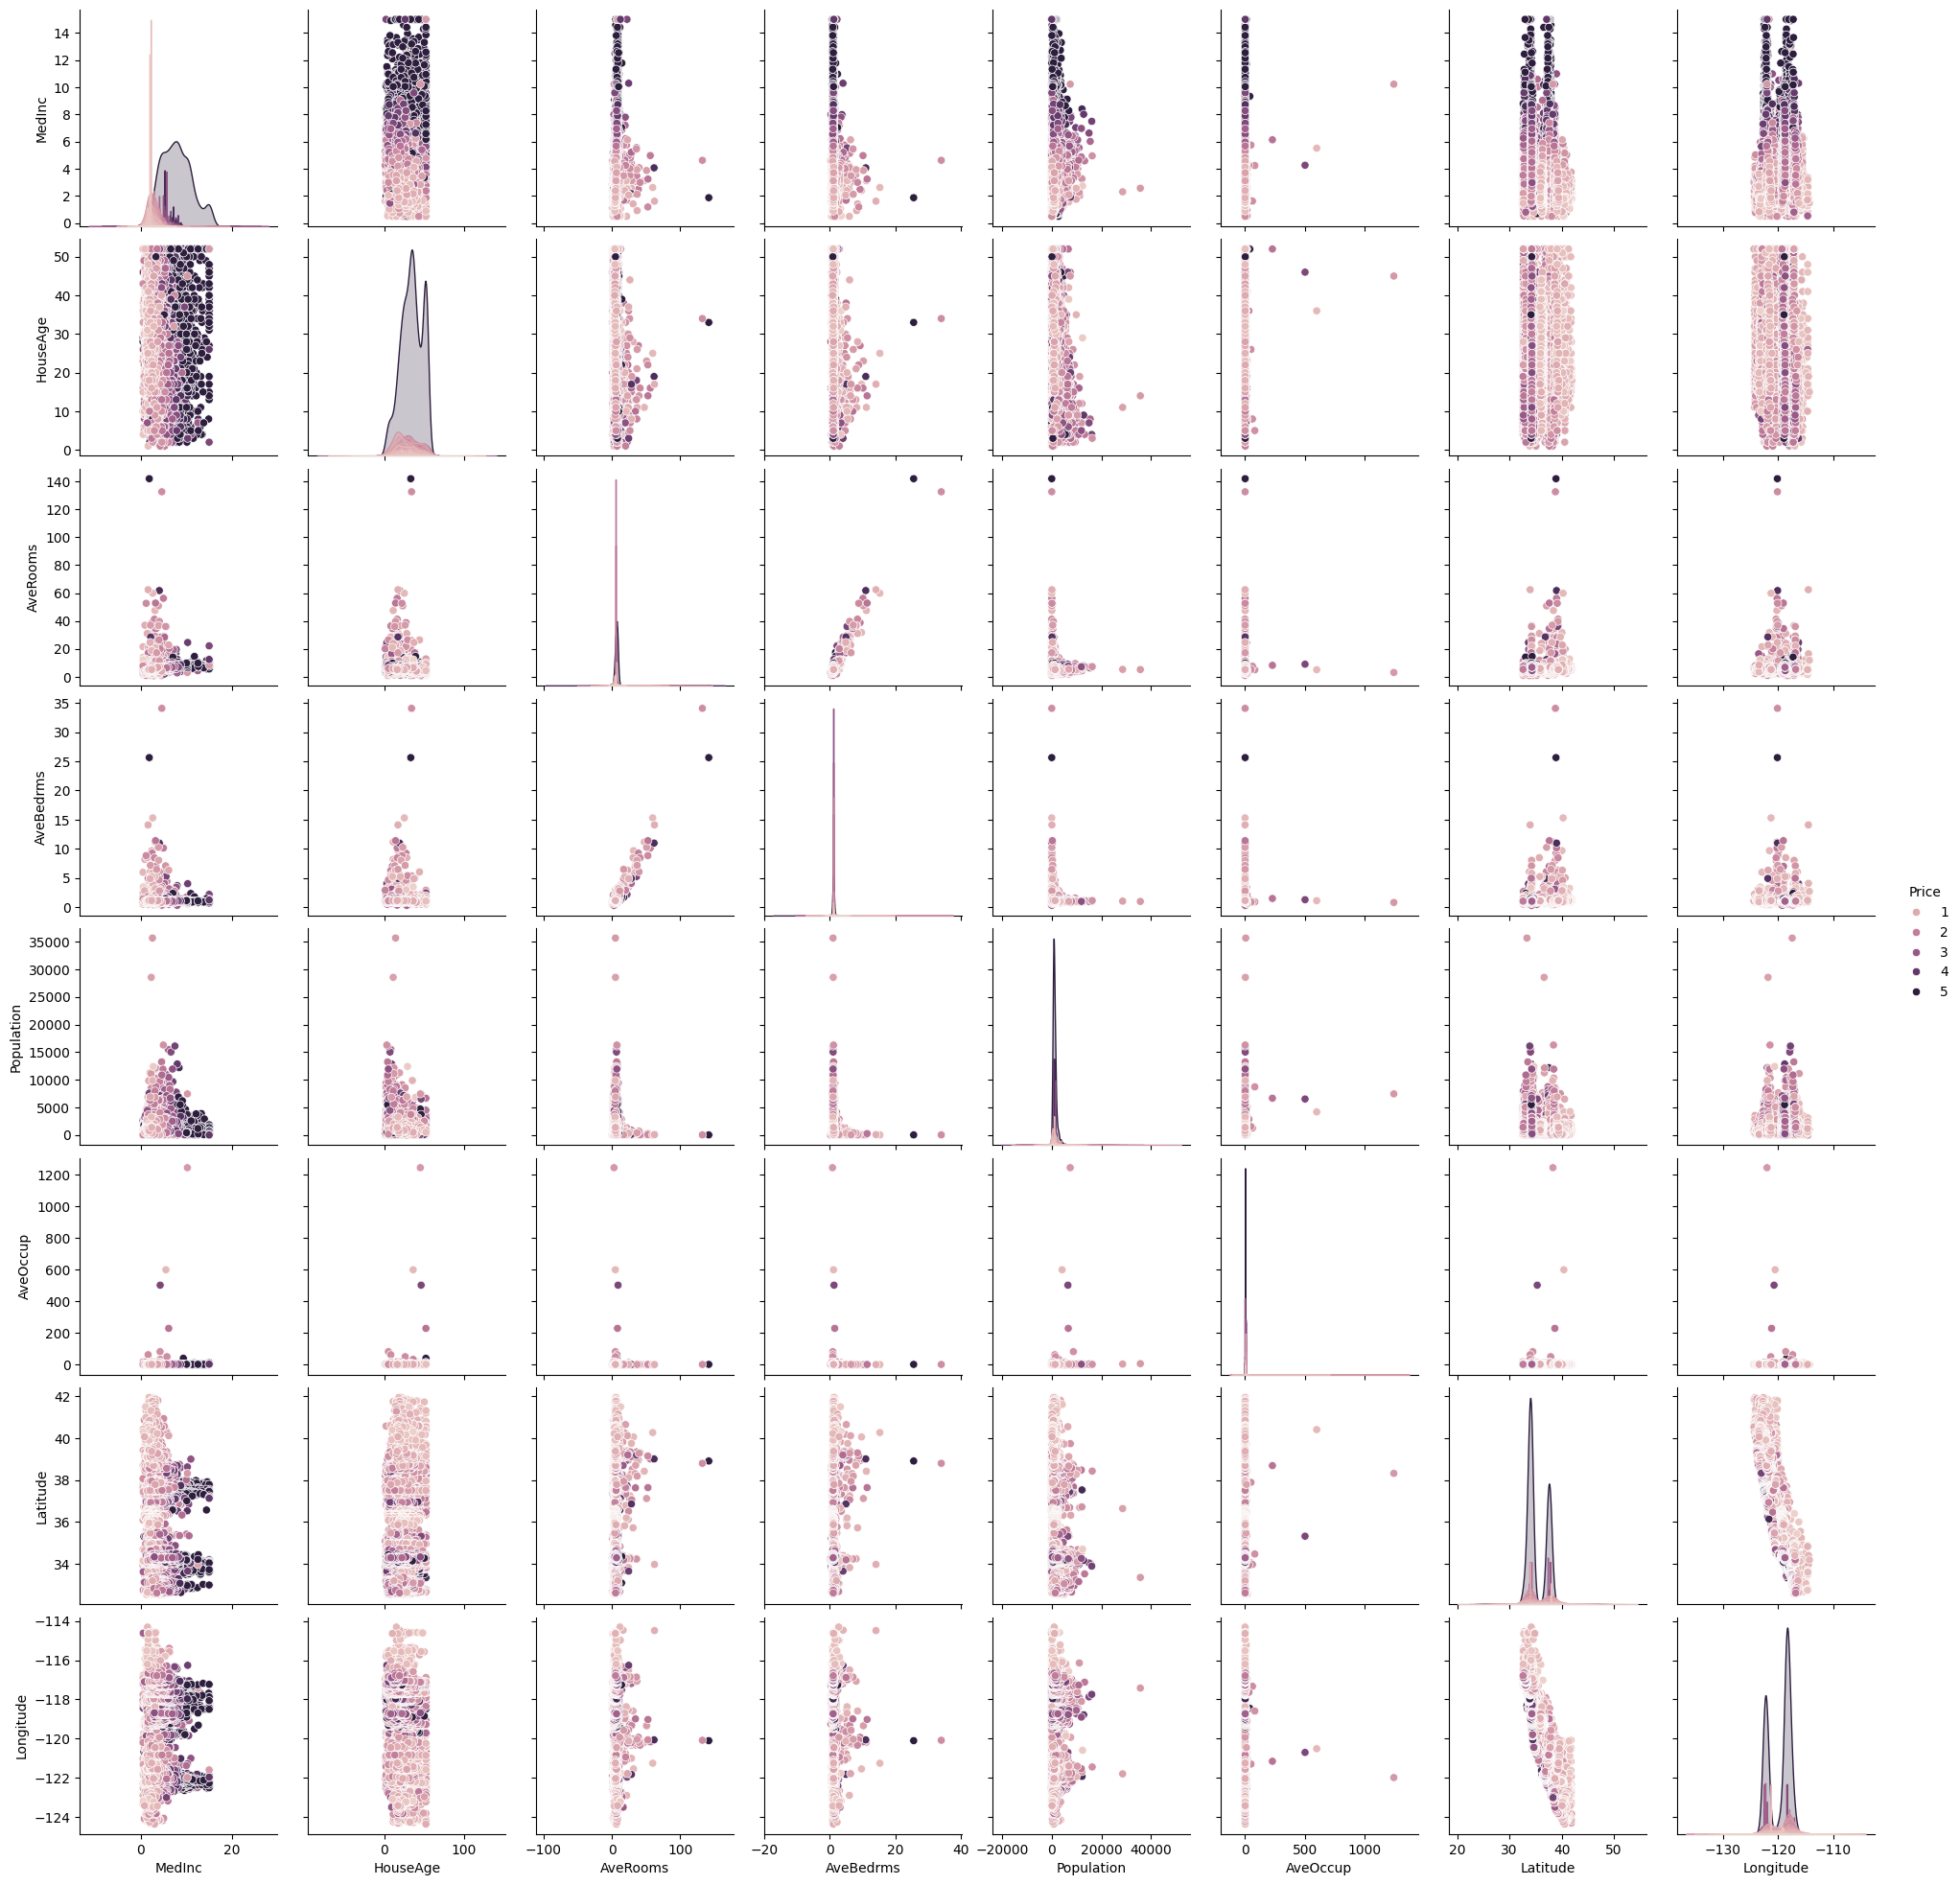

In [20]:
sns.pairplot(dataset, hue='Price')

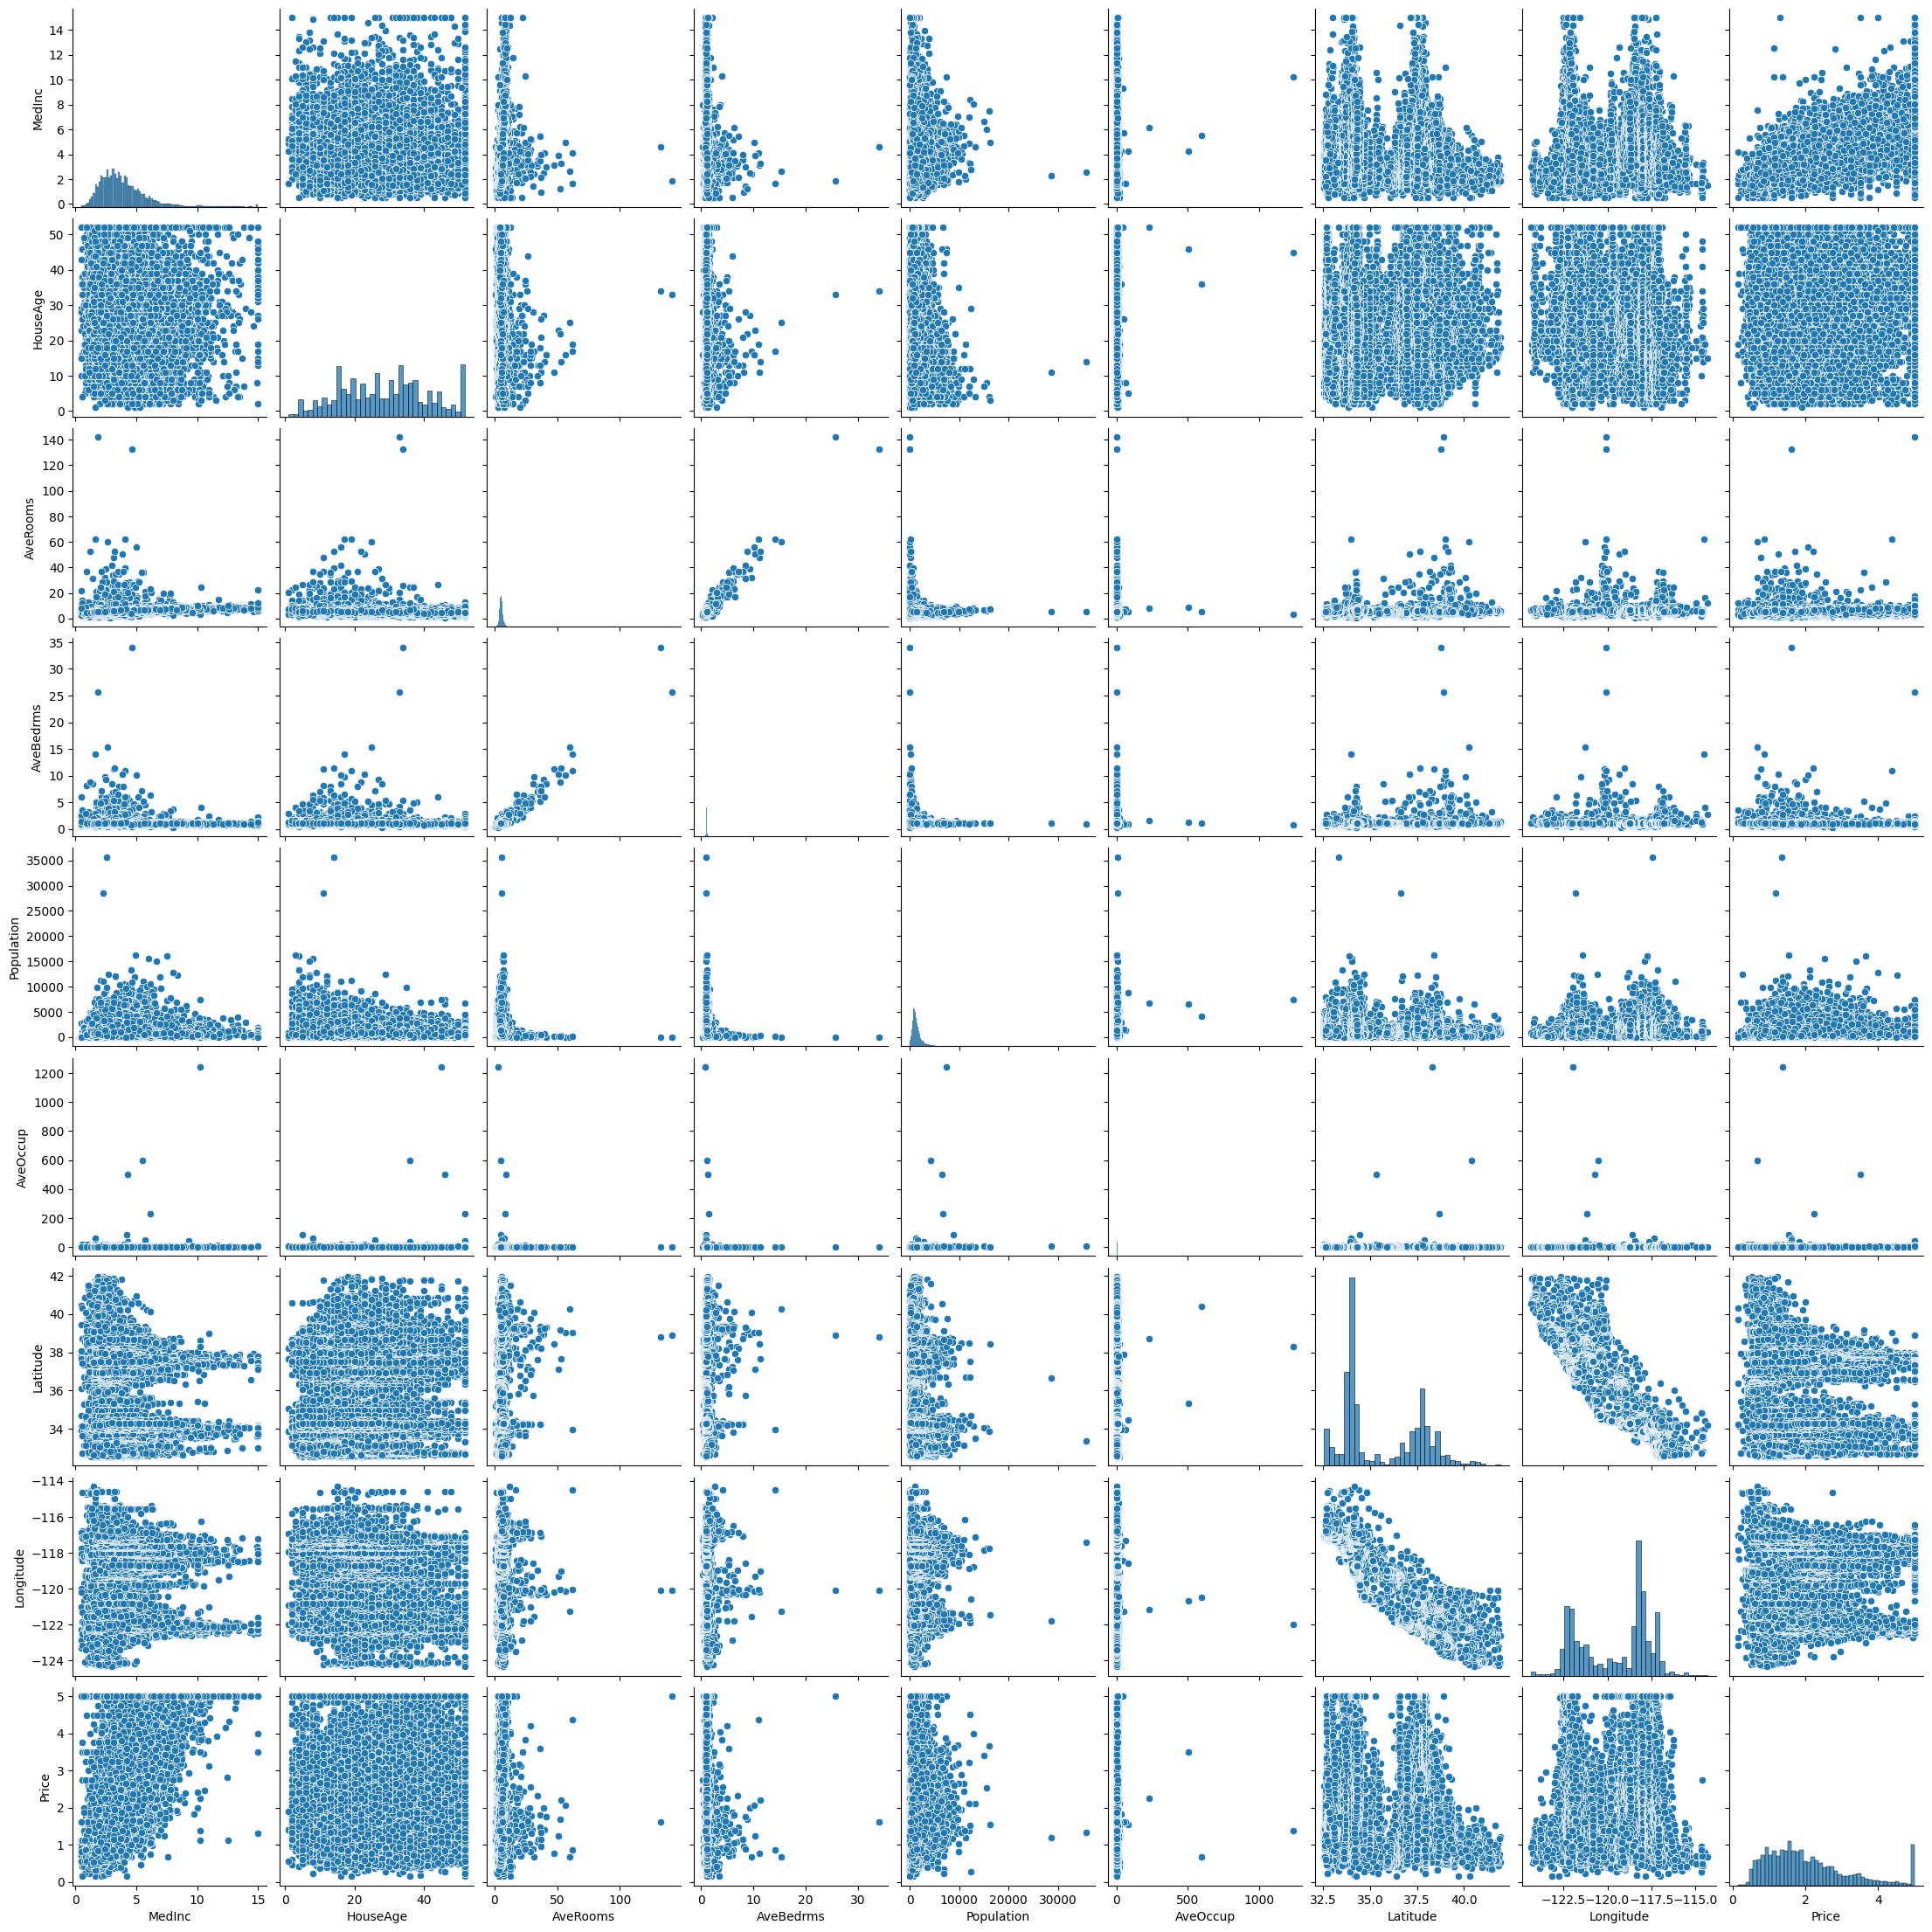

In [21]:
sns.pairplot(dataset)
# The above code generates a pairplot that displays pairwise relationships between different variables in the dataset.
# It creates a grid of scatterplots showing the relationship between each pair of variables in the dataset.

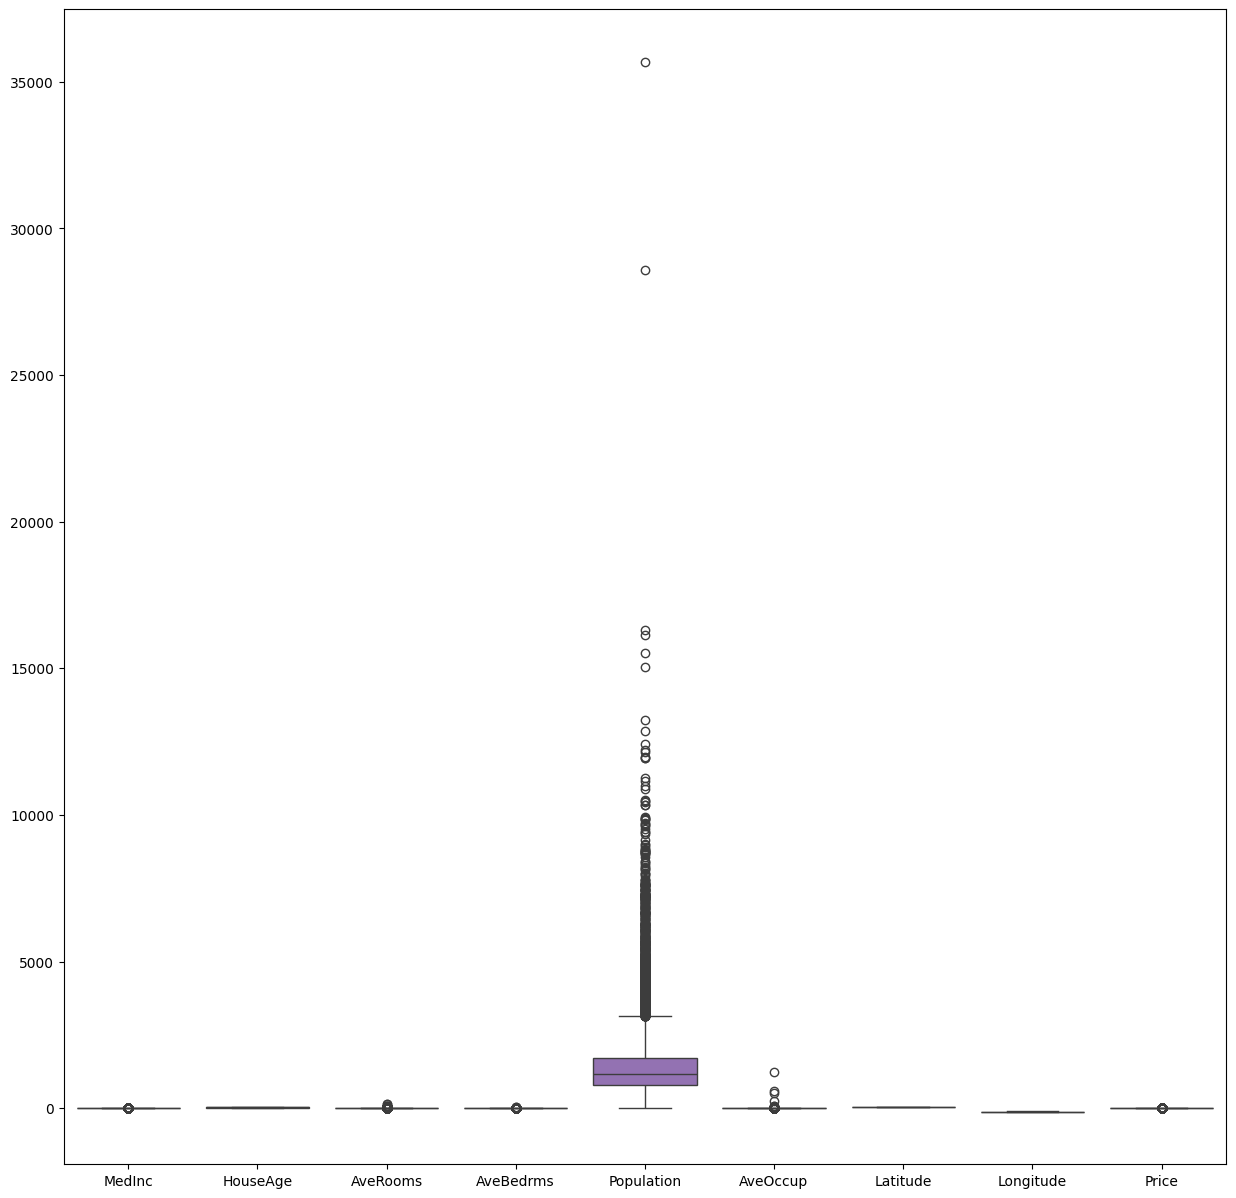

In [22]:
# using boxplot to check for outliers
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=dataset, ax=ax)
plt.savefig('boxplot.png')
# The above code generates a boxplot for each variable in the dataset to visualize the distribution of values and identify potential outliers.
# A boxplot provides a visual summary of the central tendency, dispersion, and skewness of the data distribution.

#Box (Interquartile Range - IQR)

#The box itself spans from the 25th percentile (Q1) to the 75th percentile (Q3).
#This range contains the middle 50% of the data.
#In your plot, for example, the Population feature has a tall and wide box, indicating a wider spread in the central portion of the data compared to other features.

#Line Inside the Box (Median)

#The line inside each box is the median (50th percentile).
#It shows the center of the dataset distribution.
#In the Population column, this line lies lower in the box, indicating a right-skewed distribution (many low values and a few very high ones).



#Whiskers in the above image 

# Each vertical box (like for Population, MedInc, etc.) has two thin vertical lines:

# One extends upward from the top of the box.

# One extends downward from the bottom of the box.

# These lines stop before the outlier dots begin.

# For example:

# In the Population column:

# The top whisker ends at a point just below where the outlier dots begin.

# The bottom whisker reaches slightly below the bottom of the box.

# In contrast, in columns like MedInc, the whiskers are very short, because the data is tightly packed and has fewer extreme values.

In [23]:
# split the data into independent and dependent variables
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]



In [24]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [26]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


### Explaination of the above code 
`🧠 Purpose of this Code`
This code is used to split your dataset into a training set and a testing set — a common step in machine learning to evaluate how well your model generalizes to unseen data.

`🔍 Line-by-Line Explanation`
📦 from sklearn.model_selection import train_test_split
You're importing the train_test_split function from Scikit-learn.

It’s a tool that randomly splits your dataset into training and testing parts.

`🔀 train_test_split(x, y, test_size=0.3, random_state=42)`
x = Features (input variables)

y = Labels or target values (what you're trying to predict)

test_size=0.3: 30% of the data will go into the test set, and 70% into the training set.

random_state=42: Ensures the split is reproducible every time you run the code.

Think of it like setting a seed for randomness.

`📦 The Output Variables:`
python
Copy
Edit
x_train, x_test, y_train, y_test
Variable	Contains
- x_train	70% of feature data for training
- x_test	30% of feature data for testing
- y_train	70% of target/labels for training
- y_test	30% of target/labels for testing   Here, y_test is not the predicted value — it's the actual target values for the test data. You will use y_test later to evaluate how well your model's predictions match reality. it has been used in the code below residual = y_test - reg_pred

`✅ Why This Split Is Important`
Training set: Used to teach the model.

Testing set: Used to evaluate how well the model performs on new, unseen data.

It helps prevent overfitting, where your model does great on training data but fails in real-world scenarios.



In [27]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [28]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [29]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64

In [30]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: Price, Length: 14448, dtype: float64

In [31]:
# Noramlization of given datapoints
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)


In [32]:
x_train_norm

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

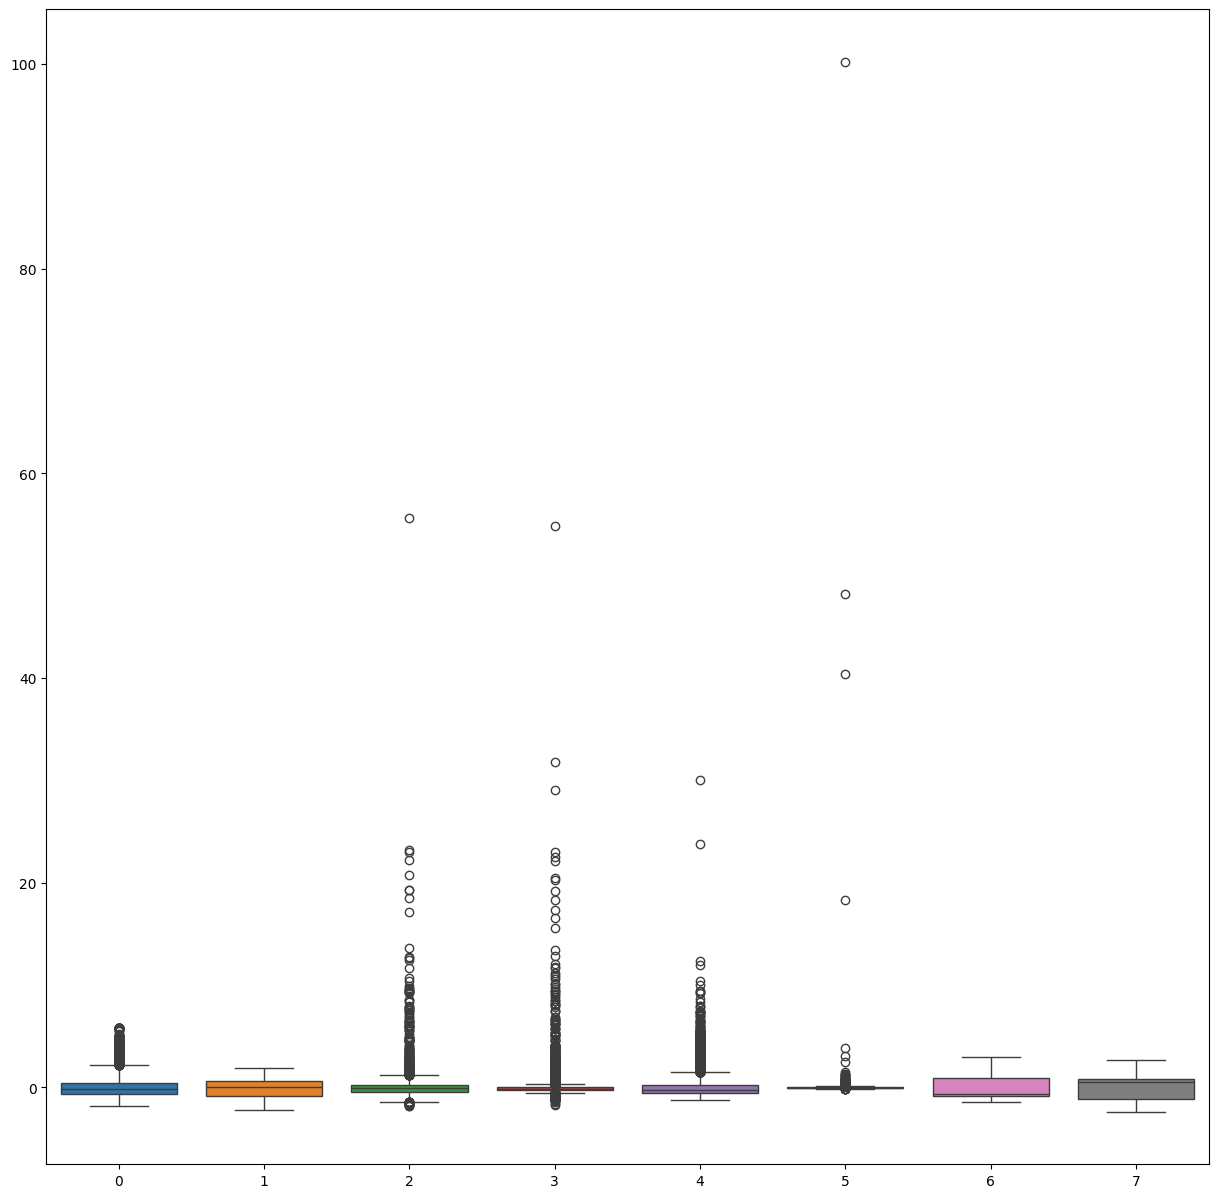

In [33]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = x_train_norm,ax = ax)
plt.savefig("boxplotTrain.jpg")

In [34]:
x_test_norm = scaler.transform(x_test)

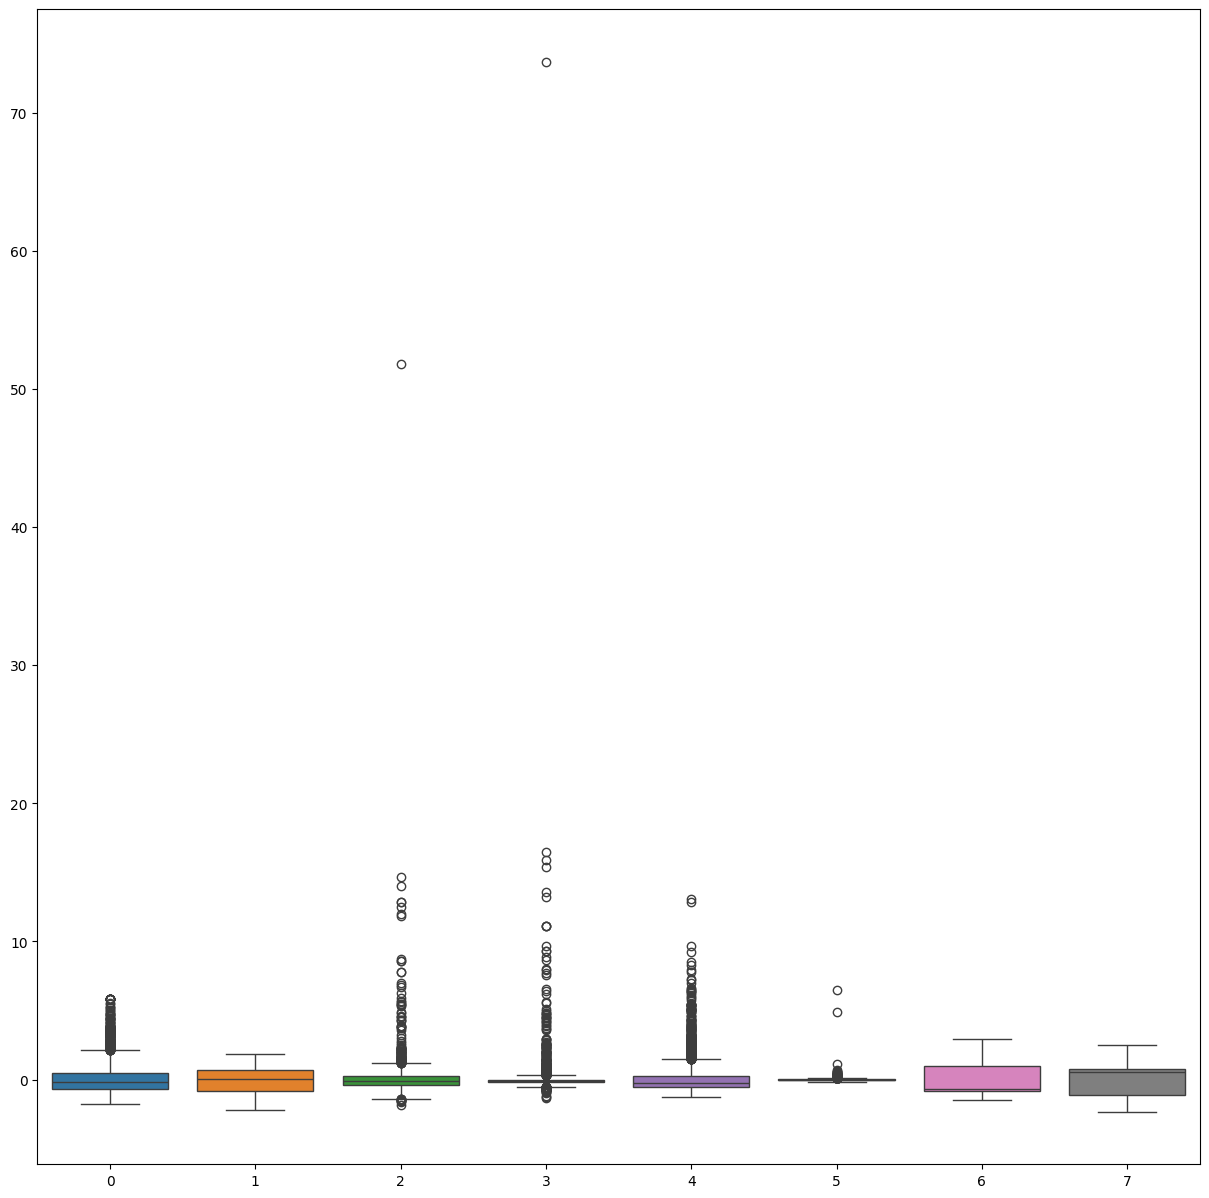

In [35]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = x_test_norm,ax = ax)
plt.savefig("boxPlotTestData.jpg")

In [36]:
## for Train set i have used -> fit_transform(x_train) and for test set i have used -> transform(x_test)
## fit_transform is used to calculate the mean and standard deviation of the data and then apply the transformation
## Test set -> i have used transform(X_test) because i have already calculated the mean and standard deviation of the data in the training set
## and i will use the same mean and standard deviation to transform the test set data.

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_norm,y_train)

LinearRegression()

In [38]:
print(regression.coef_)

## there are multiple features or columns in the dataset so the equation of the best fit line will be y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + m6x6 + m7x7 + m8x8 + c as 
## as there are 8 features in the dataset.The above code will print all the 8 m values 

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [39]:
print(regression.intercept_)
## there are multiple features or columns in the dataset so the equation of the best fit line will be y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + m6x6 + m7x7 + m8x8 + c as 
## as there are 8 features in the dataset.The above code will print the intercept i.e the c value


2.0692396089424165


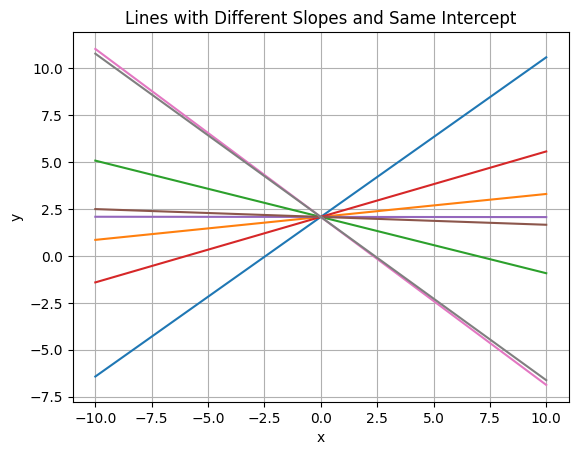

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
slopes = [ 8.49221760e-01 , 1.22119309e-01 , -2.99558449e-01,  3.48409673e-01,
 -8.84488134e-04 ,-4.16980388e-02, -8.93855649e-01 ,-8.68616688e-01]
intercept = 2.0692396089424165

# X values for plotting
x = np.linspace(-10, 10, 100)  # 100 points between -10 and 10

# Plot each line
for slope in slopes:
    y = slope * x + intercept
    plt.plot(x, y, label=f'y = {slope}x + {intercept}')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lines with Different Slopes and Same Intercept')
plt.grid(True)
plt.show()


## Model Prediction

Model prediction means testing data on test data set 

In [41]:
reg_pred = regression.predict(x_test_norm)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [ ]:
##calculate the error or the residual
residual = y_test - reg_pred


## Residuals represent the model's errors. Positive residuals indicate underestimation(Model underpredicted (too low)), while negative residuals indicate overestimation(Model overpredicted (too high)).

In [43]:
residual

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

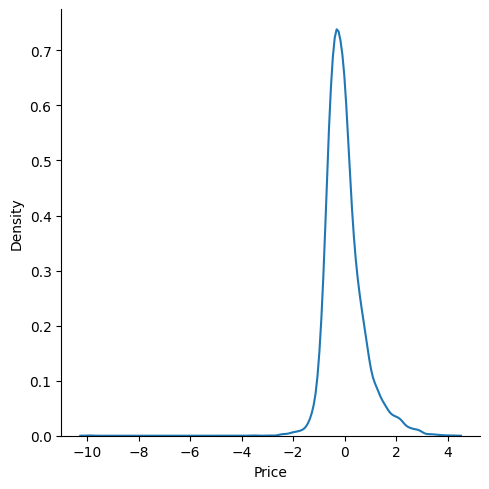

In [ ]:
## distribution plot of residual
sns.displot(residual,kind = 'kde')


# The Price is highly right-skewed (tail towards the right).

# Most values are concentrated around 0, which could mean the data was normalized or log-transformed.

# The peak is sharp, showing a high concentration of values near the mean/median.

# Outliers are likely present on the left (negative) side and right (positive) side of the distribution.


### Explaination of the code above 

`✅ displot() = “distribution plot”`
A figure-level function in Seaborn used to plot the distribution of a variable.

It can show:

- Histograms (by default)

- KDE plots (when you set kind='kde')

- Or both together!

Think of displot() as a flexible, high-level function for visualizing distributions.

`🧮 What Is kind='kde'?`
kde stands for Kernel Density Estimation.

It’s a smooth curve that estimates the probability density function of a continuous variable (like a smoothed histogram).

It's useful when you want to see the shape of a distribution without bar gaps like in a histogram.

If your residuals are normally distributed, the KDE plot will look like a bell curve centered around 0.

## Model Performance

- MAE
It tells you the average absolute difference between actual and predicted values.

Same units as the target variable (e.g., ₹ or $ if you're predicting price).

Easier to understand: "On average, the model is off by X uni

- MSE
It calculates the average of the squared differences between actual and predicted values.

Penalizes large errors more than MAE (because errors are squared).

Units are squared (e.g., ₹²), which makes it less interpretable.

In [45]:
## lower error value - MSE and MAE
## higher value => r2_score and adjusted r2 score

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(r2_score(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))  ## this code give the value of root mean squared value  

0.5305677824766752
0.5272474538305952
0.5957702326061665
0.7284008391515452


In [46]:
score = r2_score(y_test,reg_pred)

In [47]:
score

0.5957702326061665

#### Adjusted R-Square

In [48]:
# below is the formula for adjusted r2 score
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test_norm.shape[1]-1)

0.5952472117200027

#### Saving the model --> pickle file

At the time of deployment of model we need this pickle file 

In [49]:
import pickle 
pickle.dump(regression,open('model.pkl','wb'))

In [50]:
model = pickle.load(open('model.pkl','rb'))

In [51]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [52]:
scaler.transform(housing.data[0].reshape(1,-1))

c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [53]:
model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

`Below is the explaination for the above code`
1. housing.data[0]
This accesses the first data sample (row) from the dataset.

If housing is from sklearn.datasets.load_boston() or similar, housing.data is a NumPy array of shape (n_samples, n_features).

So housing.data[0] is a 1D array: one row with multiple features.

2. .reshape(1, -1)
This reshapes the 1D array (shape (n_features,)) into a 2D array (shape (1, n_features)), which is required by Scikit-learn models.

Why? Because models expect input as 2D arrays (like a table), even for a single sample.

3. scaler.transform(...)
This scales the data using the same mean and std used when training the model.

It ensures this test input is normalized in the same way as the training data — very important!

4. model.predict(...)
Finally, this passes the normalized sample into the trained model to make a prediction.

The output will be the model's predicted target value (e.g., predicted house price).



In [54]:
model.predict(x_test_norm)

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [55]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [56]:
from sklearn.linear_model import Lasso,Ridge
lasso_regression = Lasso(alpha = 1.0)
lasso_regression.fit(x_train_norm,y_train)

ridge_regression = Ridge(alpha = 1.0)
ridge_regression.fit(x_train_norm,y_train)


Ridge()

In [57]:
lasso_pred = lasso_regression.predict(x_test_norm)

In [58]:
ridge_pred = ridge_regression.predict(x_test_norm)

In [59]:
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

0.7283843311159476


In [60]:
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

1.1456636798696462
